In [1]:
#import all the dependencies
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from matplotlib import font_manager as fm
import seaborn as sns
import pycountry

In [2]:
#read the file and store it in dataframe

starbucks=pd.read_csv("directory.csv")
starbucks=starbucks.dropna(axis=1, how='all')
starbucks=starbucks.drop(["Timezone","Phone Number"],axis=1)
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,54.54,24.51


In [3]:
#Create the dataframe with USA dataset
starbucks_usa=starbucks.loc[starbucks["Country"]=="US"]
starbucks_usa["Postcode"] = starbucks_usa["Postcode"].str[:5]
# starbucks_usa =  starbucks_usa.to_numeric("Postalcode"=True)
starbucks_usa =  starbucks_usa.convert_objects(convert_numeric=True)
starbucks_usa

C:\Users\lizet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\lizet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude
11964,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,Anchorage,AK,US,99504.0,-149.78,61.21
11965,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,Anchorage,AK,US,99507.0,-149.84,61.14
11966,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,Anchorage,AK,US,99515.0,-149.85,61.11
11967,Starbucks,24936-233524,100th & C St - Anchorage,Company Owned,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515.0,-149.89,61.13
11968,Starbucks,8973-85630,Old Seward & Diamond,Company Owned,1005 E Dimond Blvd,Anchorage,AK,US,99515.0,-149.86,61.14
11969,Starbucks,72788-84447,Fred Meyer - Anchorage #11,Licensed,1000 E Northern Lights Blvd,Anchorage,AK,US,99508.0,-149.87,61.19
11970,Starbucks,79549-106150,Safeway - Anchorage #520,Licensed,3101 PENLAND PKWY.,Anchorage,AK,US,99508.0,-149.82,61.22
11971,Starbucks,75988-107245,ANC Main Terminal Ticketing,Licensed,"HMSHost, 500 West International Airport",Anchorage,AK,US,99502.0,-149.98,61.18
11972,Starbucks,11426-99254,Tudor Rd and C Street,Company Owned,"110 W. Tudor Rd, E",Anchorage,AK,US,99503.0,-149.88,61.18
11973,Starbucks,20349-108249,Fred Meyer-Anchorage East #18,Licensed,7701 Debarr Road,Anchorage,AK,US,99504.0,-149.74,61.21


# Population vs Store count
### What is the impact of polpulation to the number of stores?
-Do starbucks open more store based on the population density??

In [4]:
census_pd = pd.read_csv("census_data_2015.csv")
census_pd.fillna(0, inplace=True)
census_pd.head(15)

,Postcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Race White,Race African American,Race American Indian,...,Male Pacific Islander,Female Pacific Islander,Male Some Other Race,Female Some Other Race,Male Two or More Races,Female Two or More Races,Male White Not Hispanic,Female White Not Hispanic,Male Hispanic,Female Hispanic
0,601,17982,37.6,10816.0,7453.0,10861,60.399288,16956,102,14,...,0,0,444,402,21,43,13,27,8775,9167
1,602,40260,39.5,16079.0,8474.0,21720,53.949329,23144,693,8,...,0,0,880,665,6872,7926,575,786,18705,18976
2,603,52408,39.9,16804.0,10179.0,25459,48.578461,36177,2057,76,...,0,0,3024,2618,3769,4032,531,385,24688,25749
3,606,6331,40.8,12512.0,5863.0,4070,64.286843,4399,151,0,...,0,0,1015,640,32,94,0,0,3152,3171
4,610,28328,40.2,17475.0,8452.0,14005,49.438718,17791,950,0,...,0,0,2891,3315,1701,1654,172,85,13543,14456
5,612,64816,39.9,17229.0,9922.0,31139,48.042150,53756,3252,331,...,0,0,2815,1977,854,1023,140,84,30586,33956
6,616,10707,42.8,13705.0,7983.0,5733,53.544410,10088,224,31,...,0,0,35,55,72,202,0,19,5070,5615
7,617,24793,37.1,15361.0,7919.0,13670,55.136530,23276,539,0,...,0,0,281,365,161,141,0,80,11795,12850
8,622,7425,42.5,15689.0,10906.0,4344,58.505051,5251,104,0,...,0,0,940,1126,0,4,15,53,3397,3960
9,623,42955,40.9,16593.0,9257.0,21159,49.258526,32402,1515,40,...,0,0,3938,4731,136,177,32,42,20566,22315


In [5]:
starbucks_usa_census_pd = starbucks_usa.merge(census_pd, on='Postcode', how='left')
starbucks_usa_census_pd.to_csv('starbucks_usa_census.csv')
starbucks_usa_census_pd.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Longitude,...,Male Pacific Islander,Female Pacific Islander,Male Some Other Race,Female Some Other Race,Male Two or More Races,Female Two or More Races,Male White Not Hispanic,Female White Not Hispanic,Male Hispanic,Female Hispanic
0,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,Anchorage,AK,US,99504,-149.78,...,458.0,623.0,190.0,90.0,2919.0,2474.0,11306.0,10043.0,1766.0,1441.0
1,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,Anchorage,AK,US,99507,-149.84,...,235.0,248.0,489.0,501.0,1818.0,1975.0,13004.0,10913.0,1814.0,1419.0
2,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,Anchorage,AK,US,99515,-149.85,...,25.0,46.0,168.0,96.0,969.0,1323.0,7281.0,7023.0,746.0,1125.0
3,Starbucks,24936-233524,100th & C St - Anchorage,Company Owned,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,-149.89,...,25.0,46.0,168.0,96.0,969.0,1323.0,7281.0,7023.0,746.0,1125.0
4,Starbucks,8973-85630,Old Seward & Diamond,Company Owned,1005 E Dimond Blvd,Anchorage,AK,US,99515,-149.86,...,25.0,46.0,168.0,96.0,969.0,1323.0,7281.0,7023.0,746.0,1125.0


In [6]:
# get store count and population (max) by state and postcode
state_zip_group = starbucks_usa_census_pd.groupby(['State/Province','Postcode'])
store_count = state_zip_group['Store Number'].count()

ByZip_df = pd.DataFrame(store_count)
ByZip_df['City'] = state_zip_group['City'].max()
ByZip_df['Country'] = state_zip_group['Country'].max()
ByZip_df['Population'] = round(state_zip_group['Population'].max()/1000, 0)
ByZip_df['Median Age'] = state_zip_group['Median Age'].max()
ByZip_df['Household Income'] = state_zip_group['Household Income'].max()
ByZip_df['Per Capita Income'] = state_zip_group['Per Capita Income'].max()
ByZip_df['Latitude'] = state_zip_group['Latitude'].max()
ByZip_df['Longitude'] = state_zip_group['Longitude'].max()
ByZip_df['Poverty Count'] = state_zip_group['Poverty Count'].max()
ByZip_df['Race White'] = round(state_zip_group['Race White'].max()/1000, 0)
ByZip_df['Race African American'] = round(state_zip_group['Race African American'].max()/1000, 0)
ByZip_df['Race American Indian'] = round(state_zip_group['Race American Indian'].max()/1000, 0)
ByZip_df['Race Asian'] = round(state_zip_group['Race Asian'].max()/1000, 0)
ByZip_df['Race Pacific Islander'] = round(state_zip_group['Race Pacific Islander'].max()/1000, 0)
ByZip_df['Race Two or More'] = round(state_zip_group['Race Two or More'].max()/1000, 0)
ByZip_df['Race Two or More Including'] = round(state_zip_group['Race Two or More Including Some Other'].max()/1000, 0)
ByZip_df['Race Two or More Excluding'] = round(state_zip_group['Race Two or More Excluding Some Other'].max()/1000, 0)
ByZip_df.fillna(0,inplace=True)
ByZip_df.reset_index(inplace=True)
ByZip_df.to_csv('State_Zip.csv')

# sum store count and population by state
ByState_group = ByZip_df.groupby('State/Province').aggregate({'Population':'sum', 'Store Number':'sum','Household Income':'mean',
       'Per Capita Income': 'median', 'Poverty Count': 'sum',                                                               
       'Race White':'sum', 'Race African American':'sum',
       'Race American Indian':'sum', 'Race Asian':'sum', 'Race Pacific Islander':'sum',
       'Race Two or More':'sum',
       'Race Two or More Including':'sum',
       'Race Two or More Excluding':'sum'})
state_df = pd.DataFrame(ByState_group)
state_df.reset_index(inplace=True)
state_df.to_csv("state.csv")
print(state_df['Population'].max())
state_df.head()


32796.0


,State/Province,Population,Store Number,Household Income,Per Capita Income,Poverty Count,Race White,Race African American,Race American Indian,Race Asian,Race Pacific Islander,Race Two or More,Race Two or More Including,Race Two or More Excluding
0,AK,508.0,49,70122.347826,30968.0,44405.0,351.0,23.0,35.0,32.0,5.0,42.0,0.0,41.0
1,AL,1125.0,85,48883.740000,28038.0,175098.0,767.0,287.0,0.0,28.0,0.0,16.0,0.0,13.0
2,AR,866.0,55,44987.833333,24827.5,135899.0,684.0,114.0,2.0,20.0,1.0,20.0,0.0,19.0
3,AZ,5314.0,488,54096.548023,25790.0,851115.0,4269.0,222.0,110.0,173.0,2.0,164.0,21.0,128.0
4,CA,32796.0,2821,68638.512903,29521.5,4974019.0,20333.0,1789.0,110.0,4719.0,64.0,1496.0,257.0,1176.0


In [7]:
# create function to draw 2 y-axis
def multiple_y(chart, ax1, x_axis, data1, data2, c1, c2, x_label, ylabel1, ylabel2):
    """

    Parameters
    ----------
    ax1 : first axis
        Axis to put two scales on

    x_axis : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax1 : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()
    
    
    if chart == 'scatter':
        ax1.scatter(range(len(x_axis)),data1, s=data1*6, marker="o", alpha=0.7, facecolor=c1, edgecolors="black", linewidth=1, label=ylabel1)   
        ax2.scatter(range(len(x_axis)),data2, s=data2*6, marker="o", alpha=0.7, facecolor=c2, edgecolors="black", linewidth=1, label=ylabel2)
#         ax1.set_ylabel(ylabel1, fontsize=20) 
#         ax2.set_ylabel(ylabel2, fontsize=20)
    
    
    if chart == 'line':
        lns1 = ax1.plot(range(len(x_axis)), data1, color=c1, marker="_", linewidth=2, label=ylabel1)
        lns2 = ax2.plot(range(len(x_axis)), data2, color=c2, marker="s", linewidth=2, label=ylabel2)
    
    ax2.set_ylim(0, (data2.max()+10))
    
    lns = (lns1+lns2)
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0, fontsize=20, frameon=True)
    
    ax.set_xticks(range(len(x_axis)))
    ax.set_xticklabels(x_axis, rotation=90,fontsize=15) 
    
    ax1.set_ylim(data1.min(), data1.max()+1000)
    ax2.set_ylim(data2.min(), data2.max()+10)

    return ax1, ax2

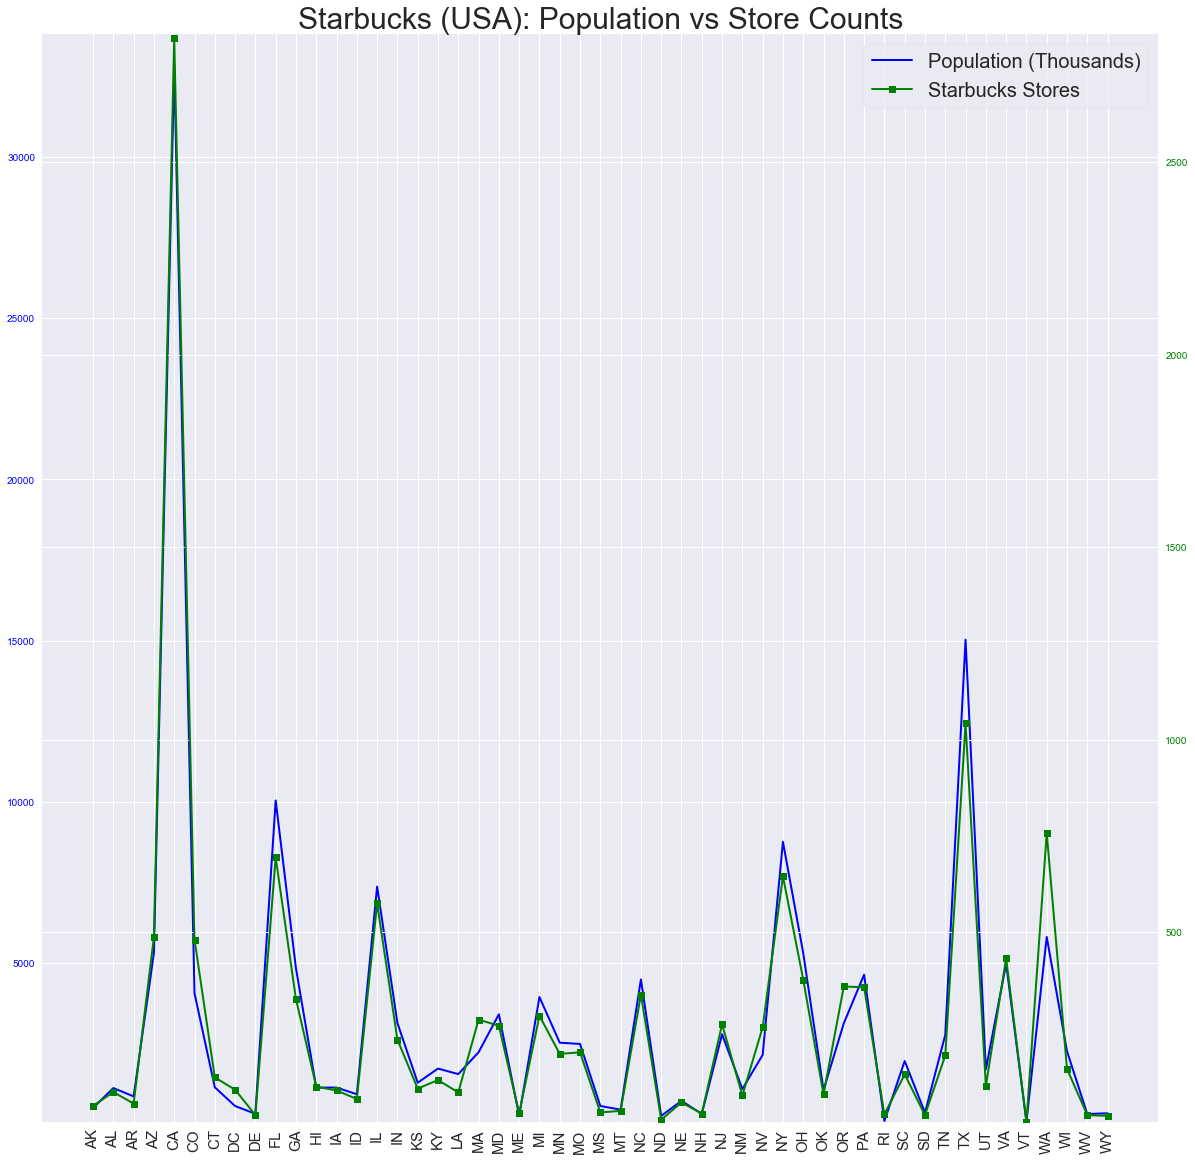

In [8]:
# What is the relationship of polpulation to the number of stores
#    There is a direct relationship between population and the number of starbuck stores in that area
#

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111)
ax1, ax2 = multiple_y("line", ax, state_df['State/Province'], state_df['Population'], state_df['Store Number'], 'blue', 'green','State','Population (Thousands)', 'Starbucks Stores')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
                      
color_y_axis(ax1, 'blue')
color_y_axis(ax2, 'green')

plt.title("Starbucks (USA): Population vs Store Counts", fontsize=30)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Stores vs Population.png")

# Race vs Store Count

-Do starbucks has any inclination towards having a store in certain demographics?

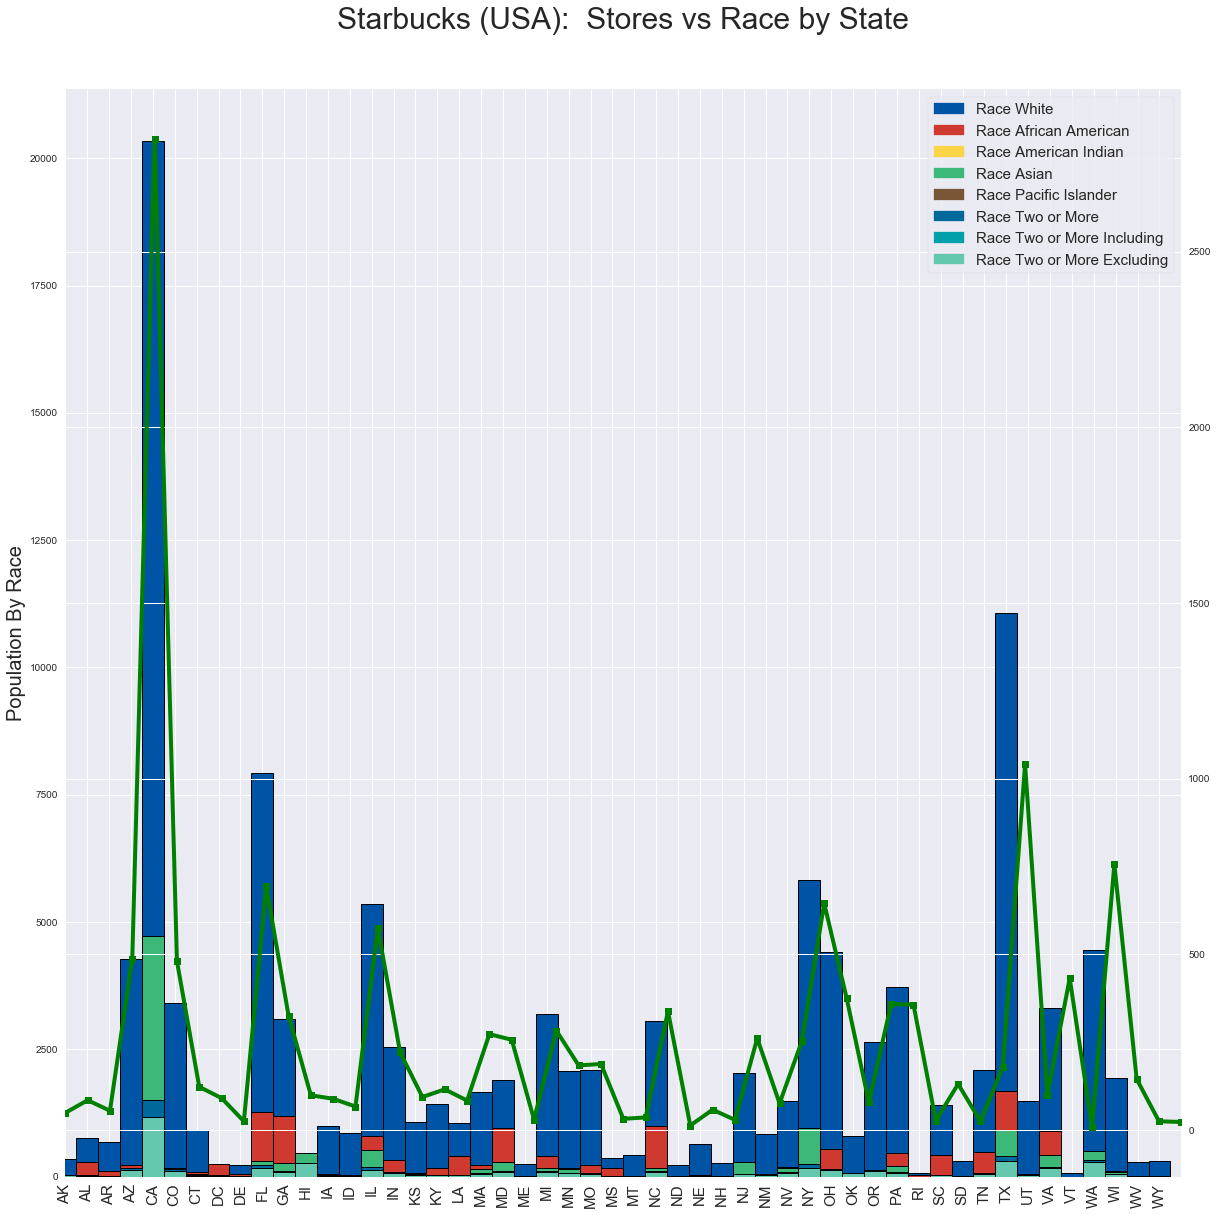

In [9]:

# set fontsize of labels
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20)

race = ['Race White',
       'Race African American', 'Race American Indian', 'Race Asian',
       'Race Pacific Islander', 'Race Two or More',
       'Race Two or More Including', 'Race Two or More Excluding']
colors = ['#0054a6','#cf392f','#fcd447','#3cb878','#795636','#00699b','#00a0aa','#64c8af','#afe1c8','#aaaaaa']

rects = []

x_axis = np.arange(0, len(state_df['State/Province']))

fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111)

ax2 = ax.twinx()
for c, r in zip(colors, race):
    rects.append(ax.bar(x_axis,state_df[r],width=1, color=c, align='center', edgecolor='black', label=r, linewidth=1))


state_df['Store Number'].plot(secondary_y=True, color='green', linewidth=4, marker='s')


# setup title for chart
title = ax.set_title("Starbucks (USA):  Stores vs Race by State", fontsize=30)
title.set_position([.5, 1.05])

# setup tick labels for x axis
xlabels=[]
xlabels.extend(state_df['State/Province'])
ax.set_xticklabels(xlabels, rotation=90, fontsize=15)


# setup tick values for y axis
ax.set_xticks(np.arange(0, len(state_df['State/Province'])+1))
ax2.set_yticks(np.arange(0, state_df['Store Number'].max()+5))

# setup 
ax2.set_ylabel("Starbucks Stores", fontsize=20)
ax.set_ylabel("Population By Race", fontsize=20)

# Create legend
patches = []
handles, labels = ax.get_legend_handles_labels()
for r, c, r2 in zip(rects, colors, race):
    patches.append(mpatches.Patch(color=c, label=r2))
plt.legend(handles=patches, frameon=True, loc="best", fontsize=15)


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Store by Race.png")

# What is the relationship of household income to the number of stores?

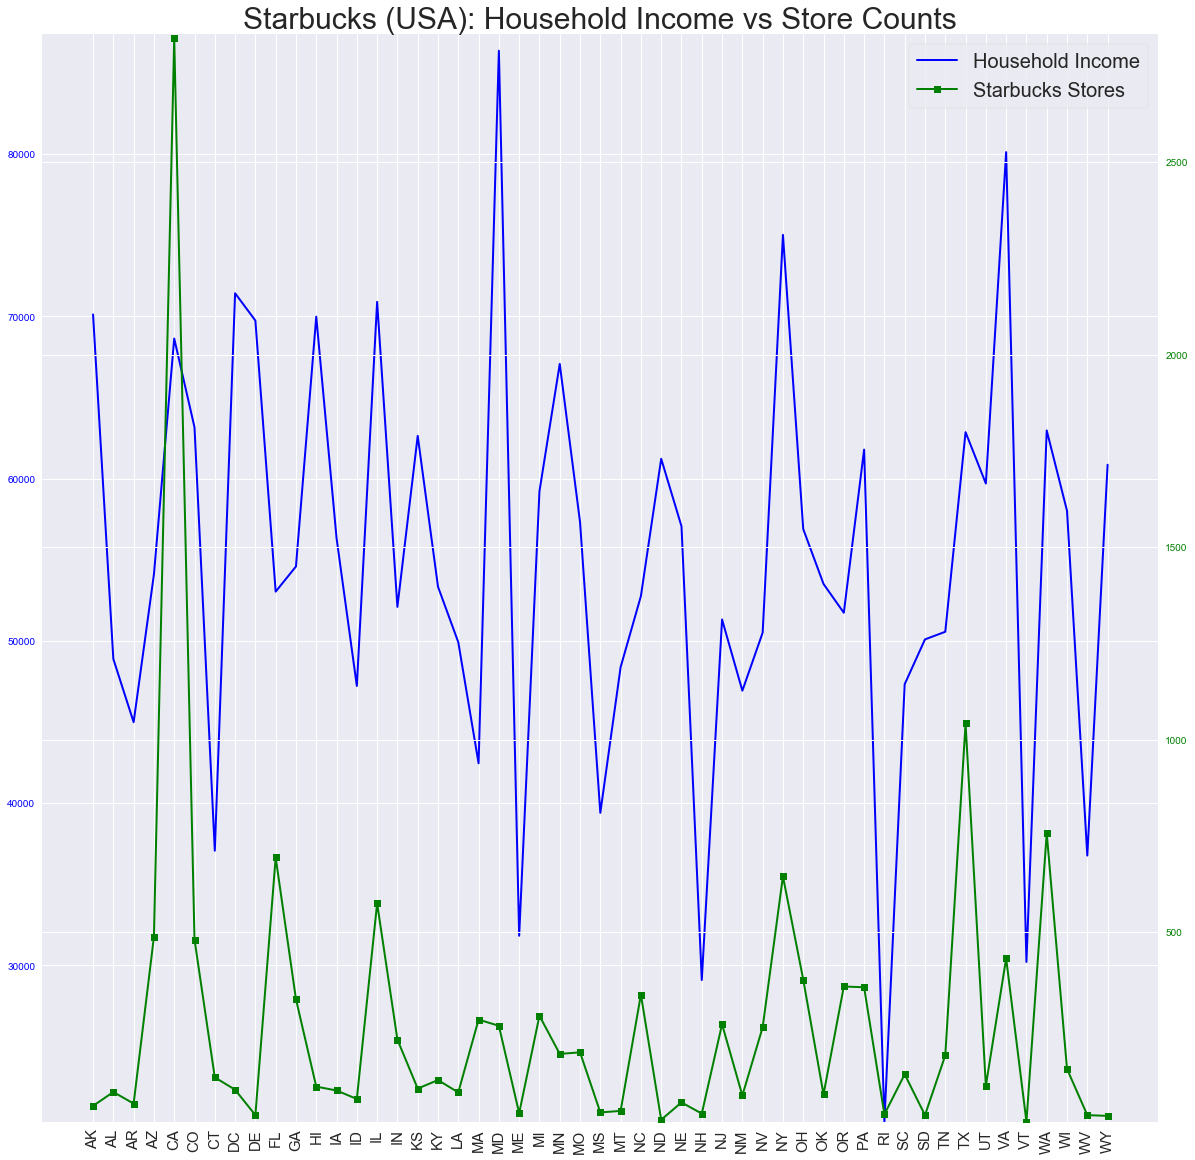

In [10]:


fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111)
ax1, ax2 = multiple_y("line", ax, state_df['State/Province'], state_df['Household Income'], state_df['Store Number'], 'blue', 'green','State','Household Income', 'Starbucks Stores')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
                      
color_y_axis(ax1, 'blue')
color_y_axis(ax2, 'green')

plt.title("Starbucks (USA): Household Income vs Store Counts", fontsize=30)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Stores vs Household Income.png")

# What is the relationship of household income to the number of stores

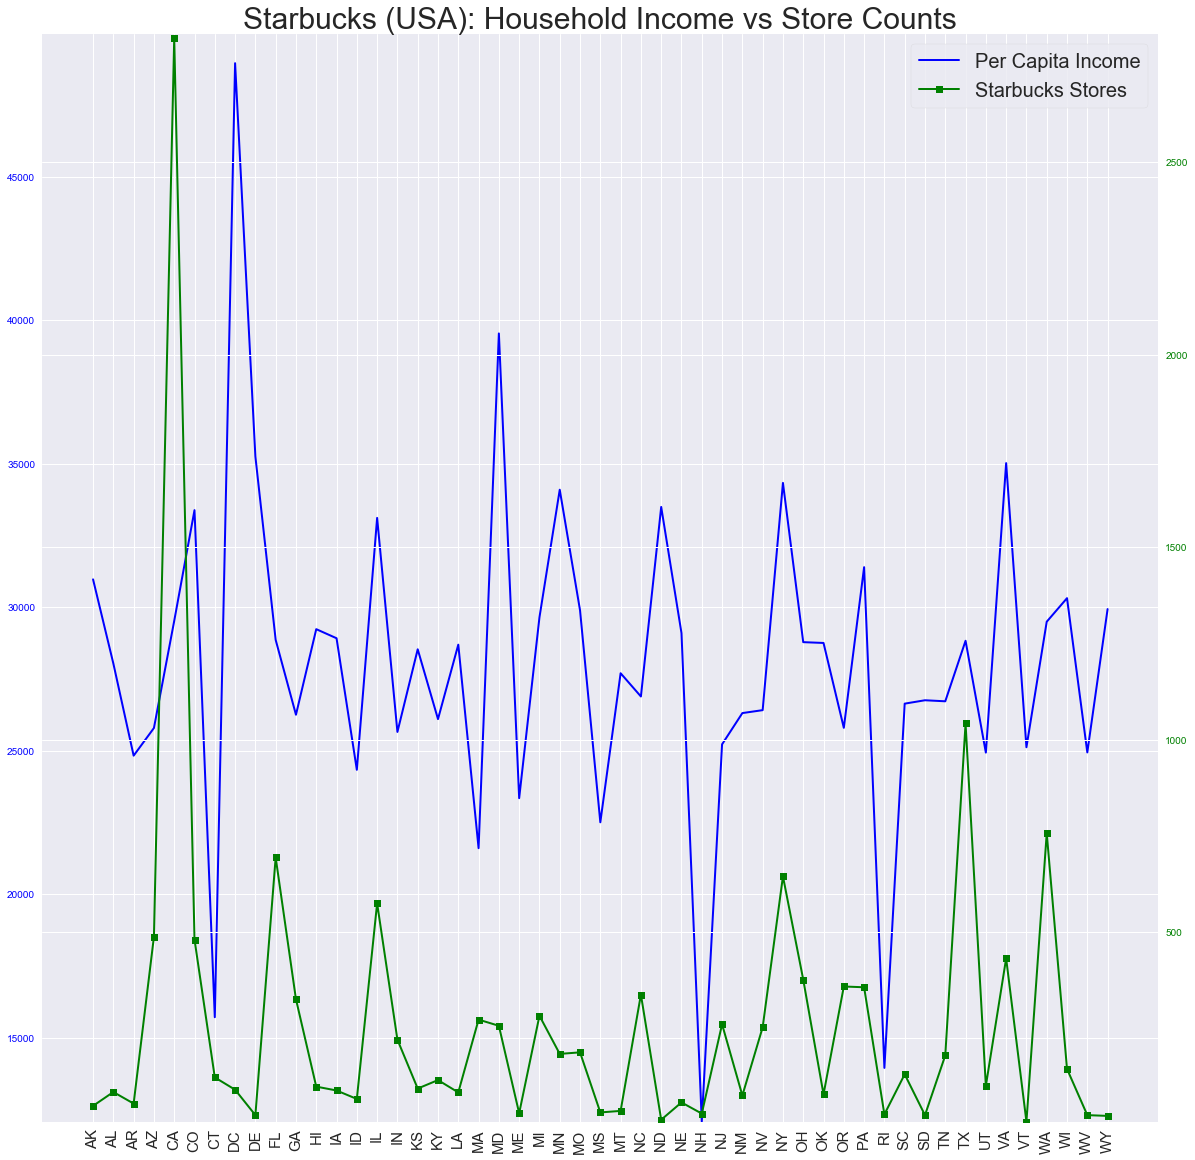

In [11]:

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111)
ax1, ax2 = multiple_y("line", ax, state_df['State/Province'], state_df['Per Capita Income'], state_df['Store Number'], 'blue', 'green','State','Per Capita Income', 'Starbucks Stores')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
                      
color_y_axis(ax1, 'blue')
color_y_axis(ax2, 'green')

plt.title("Starbucks (USA): Household Income vs Store Counts", fontsize=30)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("Stores vs Household Income.png")